In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
#importar pandas e matplotlib
#data set do site kaggle: https://www.kaggle.com/datasets/aungpyaeap/supermarket-sales

In [2]:
df = pd.read_csv("C:\\Users\\User\\Documents\\supermarket.csv")
#ler dados e colocar na dataframe "df"

In [3]:
df.head()
#primeiras 5 linhas


,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


### Qual o mês com mais faturamento??

In [4]:
#como o mês está em formato MM/DD/YYYY, o mês será os primeiros digitos antes de "/", logo podemos criar uma nova coluna
#chamada mês, com os primeiros digitos da data.
df["Mes"] = df['Date'].str.split('/').str[0]
#cria uma coluna chamada mes

(array([0, 1, 2]), [Text(0, 0, '1'), Text(1, 0, '2'), Text(2, 0, '3')])

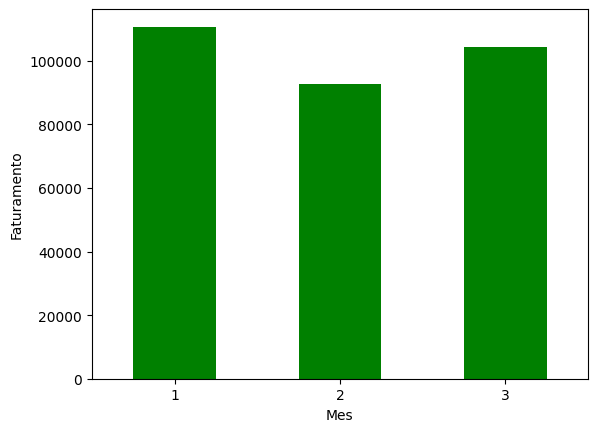

In [5]:
#coluna faturamento é a coluna "cogs" , que é a quantidade * preço de unidade, sem contar o imposto pago pelo cliente:
#filtrando por mes, com a soma do faturamento:
faturamento_mensal = df.groupby(['Mes'])['cogs'].sum()
faturamento_mensal.plot(kind="bar", color = "green")
plt.ylabel('Faturamento')
plt.xticks(rotation=0)

### Qual o método de pagamento que mais proporcionou faturamento?

(array([0, 1, 2]),
 [Text(0, 0, 'Cash'), Text(1, 0, 'Credit card'), Text(2, 0, 'Ewallet')])

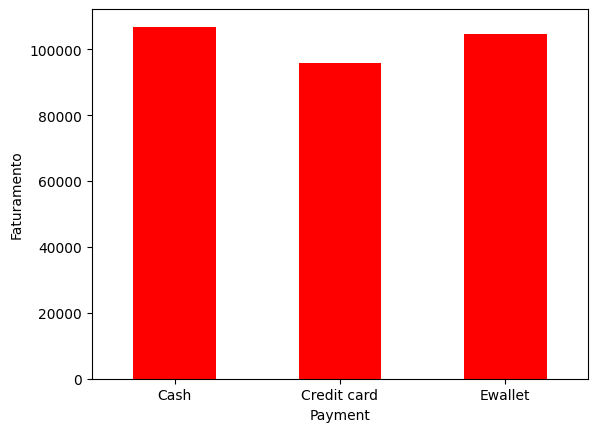

In [6]:
#mesma lógica que antes, mas com o faturamento, 
#filtrando os diferentes tipos de pagamentos e fazendo a soma do faturamento proporcionado por cada:
pagamentos = df.groupby(['Payment'])['cogs'].sum()
pagamentos.plot(kind="bar", color = "red")
plt.ylabel('Faturamento')
plt.xticks(rotation=0)

### Qual Branch mais proporcionou faturamento?


Text(0, 0.5, 'Mercados')

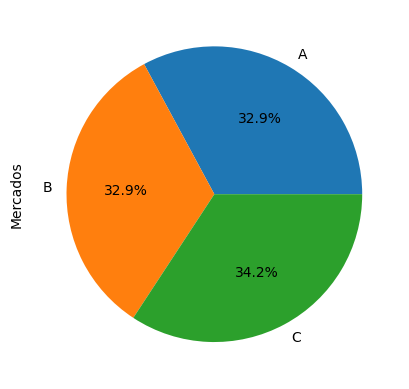

In [7]:
#repetindo o processo novamente:
mercados = df.groupby(['Branch'])['cogs'].sum()
plt.pie(mercados, labels=mercados.index, autopct='%1.1f%%')
plt.ylabel("Mercados")


### Qual Linha de produtos mais popular?


In [8]:
df["Product line"].value_counts()
#essa função mostra a quantidade de ocorrência de cada valor.

Product line
Fashion accessories       178
Food and beverages        174
Electronic accessories    170
Sports and travel         166
Home and lifestyle        160
Health and beauty         152
Name: count, dtype: int64

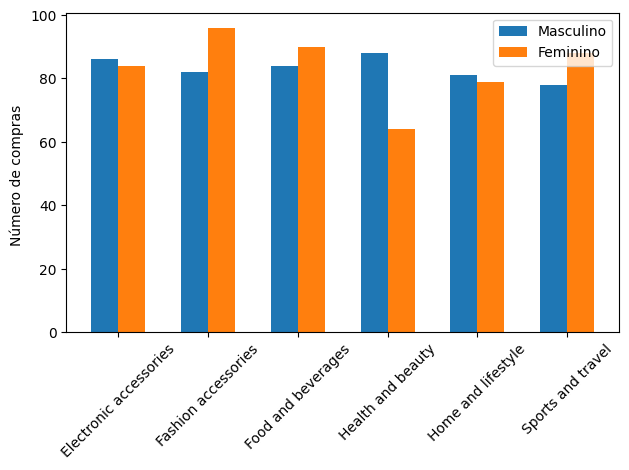

In [24]:
#verificando qual o gênero do público alvo de cada linha de produtos:
males = df[df['Gender'] == 'Male'].groupby('Product line').size()
females = df[df['Gender'] == 'Female'].groupby('Product line').size()
product_lines = males.index  

largura = 0.3

x = np.arange(len(product_lines))


plt.bar(x, males, width=largura, label='Masculino')


plt.bar(x + largura, females, width=largura, label='Feminino')


plt.ylabel('Número de compras ')
plt.xticks(x + largura / 2, product_lines, rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

### Qual cidade possui maior satisfação (Rating)?

In [13]:
#mesma lógica novamente, mas calculando a média dos valores:
df.groupby(['City'])['Rating'].mean()

City
Mandalay     6.818072
Naypyitaw    7.072866
Yangon       7.027059
Name: Rating, dtype: float64

### Qual horário com mais compras?

In [35]:
#Utilizando o mesmo método de criar uma coluna só que dessa vez com as horas:
df["Horas"] = df['Time'].str.split(':').str[0]
horas = df["Horas"].value_counts() # faz a conta da quantidade de vendas por cada hora diferente

Text(0, 0.5, 'Quantidade de vendas')

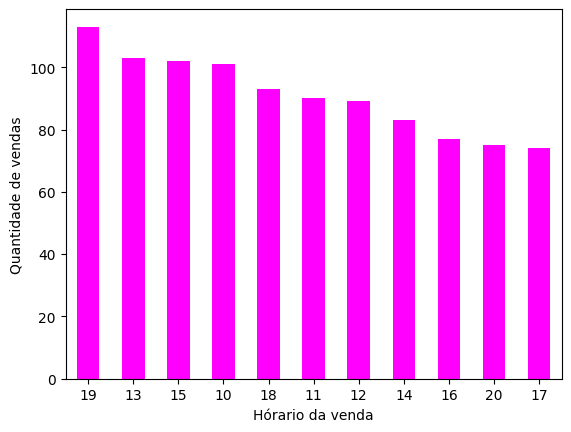

In [42]:
horas.plot(kind = "bar",color = "magenta")
plt.xticks(rotation=0)
plt.xlabel("Hórario da venda")
plt.ylabel("Quantidade de vendas")